In [2]:
import yfinance as yf
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns

In [3]:
sma = 7
user = '165503503'
clave = 'Oy3OmaBcqJZ2'
def dataframe_instrumento_get(fecha_inicio, fecha_termino, timeseries):
    #fecha_inicio = '2017-01-01' # formato %Y,%m;%d
    #fecha_termino = '2021-12-31' # formato %Y,%m;%d
    #timeseries = 'F074.IPC.IND.Z.EP18.C.M'
    url = f'https://si3.bcentral.cl/SieteRestWS/SieteRestWS.ashx?user={user}&pass={clave}&firstdate={fecha_inicio}&lastdate={fecha_termino}&timeseries={timeseries}&function=GetSeries'
    response = requests.get(url)
    response = response.json()
    data = response['Series']['Obs']
    nombre = response['Series']['descripEsp']
    df = pd.DataFrame(data)
    df = df[['indexDateString', 'value']]
    df['value'] = df['value'].replace('NaN', 0)
    df['value'] = df['value'].replace('NeuN', 0)
    df['value'] = pd.to_numeric(df['value'])
    df = df.rename(columns={'indexDateString': 'fecha', 'value': nombre})
    return df

dolar = dataframe_instrumento_get('2023-01-01', '2025-08-31', 'F073.TCO.PRE.Z.D')
dolar = dolar.set_index('fecha')
dolar.index = pd.to_datetime(dolar.index, format="%d-%m-%Y")
dolar.replace(to_replace=0, method='ffill', inplace=True)
dolar.columns = ['dolar']
dolar.reset_index(inplace=True)
dolar['Mes'] = dolar['fecha'].dt.strftime('%b-%Y')
dolar.set_index(keys='fecha', inplace=True)
dolar[f'SMA{sma}'] = dolar['dolar'].rolling(sma).mean()

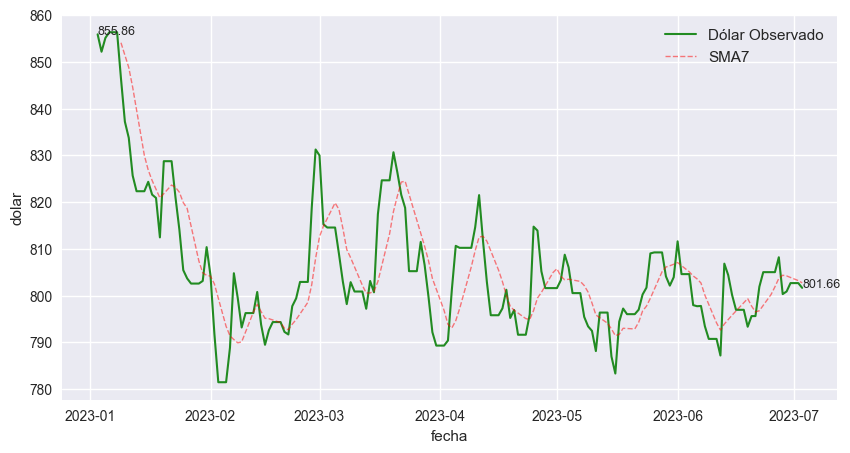

In [4]:
color_palette = sns.color_palette("hls", dolar['Mes'].nunique())
sns.set_palette(color_palette)

with plt.style.context("seaborn", after_reset=True):
    fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=100)
    sns.set_theme(style="darkgrid")
    # ax.plot(dolar['dolar'],ls="solid",lw=1.5,color="forestgreen",label="Dólar Observado")
    sns.lineplot(dolar['dolar'],ax=ax,color="forestgreen",lw=1.5,label="Dólar Observado")
    ax.plot(dolar[f'SMA{sma}'],ls="dashed",lw=1,color="red",label=f"SMA{sma}",alpha=0.5)
    ax.annotate(text=round(dolar['dolar'][0],2),xy=(dolar[['dolar']].index[0], dolar['dolar'][0]),fontsize=9)
    ax.annotate(text=round(dolar['dolar'][-1],2),xy=(dolar[['dolar']].index[-1], dolar['dolar'][-1]),fontsize=9)
    plt.legend()
    plt.show()
    